Movimiento browniano geométrico


C:\Users\marti\AppData\Local\Temp\ipykernel_26896\3053750113.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


--- 10.99035096168518 seconds ---
Sum squared difference in mean = 3539.8190364364555
Sum squared difference in var = 488717276.9707288
--- 0.361159086227417 seconds ---
Sum squared difference in mean = 3539.8190364364555
Sum squared difference in var = 488717276.9707288
---30.4 X speed up from vectorization---


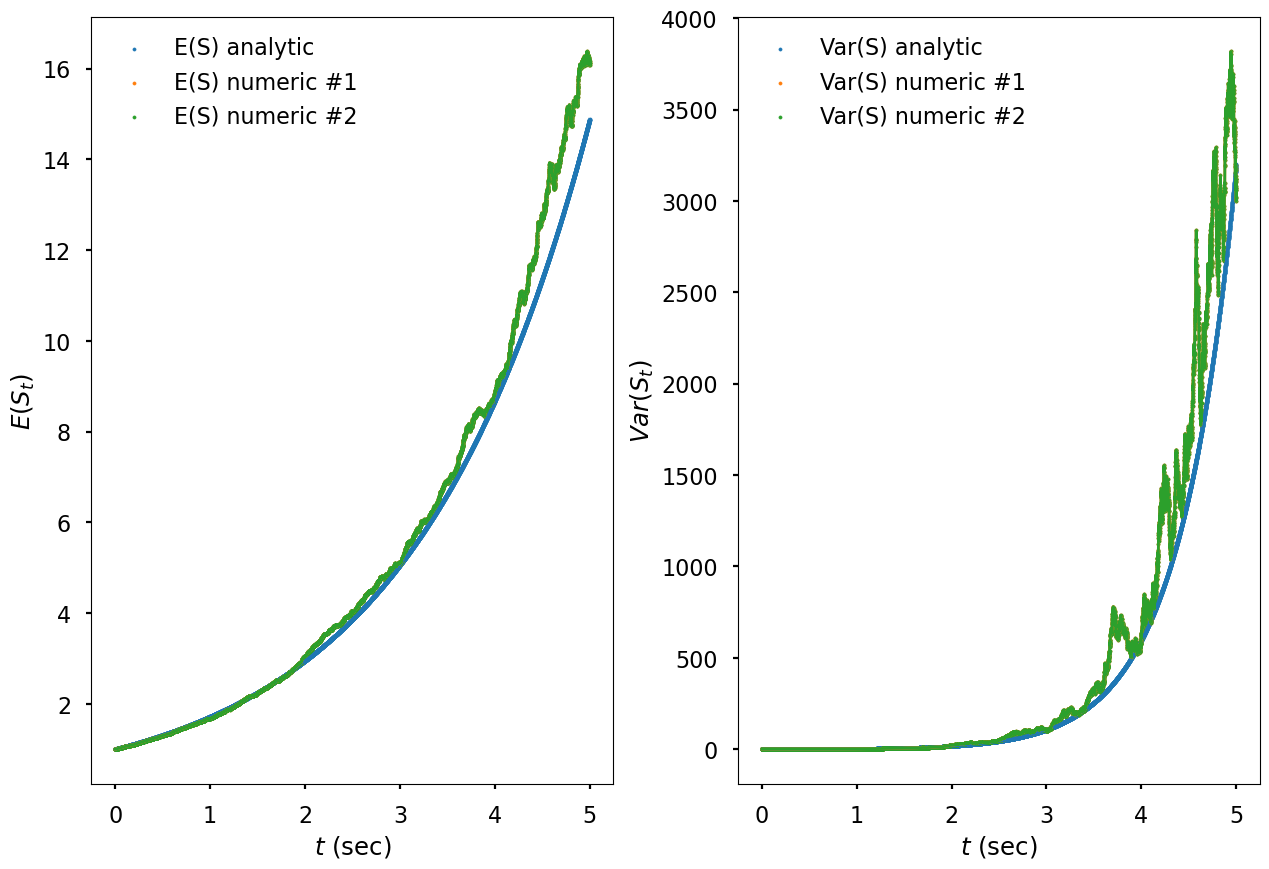

In [1]:
"""
Simulation of a geometric Brownian motion using stochastic differential 
equations and Monte Carlo simulations
The equation is as follows:
    dS = u*S*dt + sigma*S*dW
where S is the stochastic process, u is the perfentage drift, sigma is the
percentage volatility, dt is a time step, and dW is a Wiener process 
increment (normal random variable with 0 mean and variance dt)
This is numerically solved using an Euler-Mayurama finite difference scheme:
    S[t+dt] = (1 + u*dt)*S[t] + sigma*S[t]*dW[t]
We compare the computation time using two methods: (1) the raw iteration method
where each Monte Carlo run is done sequentially and (2) the vectorized method
Author: Oscar A. Nieves
"""
import numpy as np
from matplotlib import pyplot as plt
import time
plt.close('all')
plt.style.use('seaborn-poster')
# Input Parameters
S0 = 1 # initial value of S
M = 1000 # total Monte Carlo simulations
N = 10000 # total 
t = np.linspace(0, 5, N)
dt = t[1] - t[0]
seed0 = 1
u = 0.54
sigma = 0.74
np.random.seed(seed0)
# Analytic solutions
Analytic_mean = S0*np.exp(u*t)
Analytic_var =  S0**2 * np.exp(2*u*t)*(np.exp(sigma**2 * t) - 1)
# Numerical solutions
# Method (1)
S_1 = np.zeros( (M, N) )
dW = np.sqrt(dt)*np.random.normal(0, 1, (M, N))
S_1[:, 0] = S0
start_time_1 = time.time()
for mc in range(M):
    for nt in range(N-1):
        S_1[mc, nt+1] = (1 + u*dt)*S_1[mc, nt] + sigma*S_1[mc, nt]*dW[mc, nt]
        
S_1_mean = np.mean(S_1, axis=0)
S_1_var = np.mean(S_1**2, axis=0) - S_1_mean**2
D1_mean = np.sum( np.abs(Analytic_mean - S_1_mean)**2 )
D1_var = np.sum( np.abs(Analytic_var - S_1_var)**2 )
after_time_1 = time.time() - start_time_1
print("--- %s seconds ---" % (after_time_1))
print("Sum squared difference in mean = " + str(D1_mean))
print("Sum squared difference in var = " + str(D1_var))
# Method (2)
S_2 = np.zeros( (M, N) )
S_2[:, 0] = S0
start_time_2 = time.time()
for nt in range(N-1):
    S_2[:, nt+1] = (1 + u*dt)*S_2[:, nt] + sigma*S_2[:, nt]*dW[:, nt]
        
S_2_mean = np.mean(S_2, axis=0)
S_2_var = np.mean(S_2**2, axis=0) - S_2_mean**2
D2_mean = np.sum( np.abs(Analytic_mean - S_2_mean)**2 )
D2_var = np.sum( np.abs(Analytic_var - S_2_var)**2 )
after_time_2 = time.time() - start_time_2
print("--- %s seconds ---" % (after_time_2))
print("Sum squared difference in mean = " + str(D2_mean))
print("Sum squared difference in var = " + str(D2_var))
speed_up_ratio = round(after_time_1/after_time_2, 1)
print("---%s X speed up from vectorization---" % (speed_up_ratio))
# Generate plots
fig1, ax1 = plt.subplots(1,2)
marker_size = 5
ax1[0].plot(t, Analytic_mean, linewidth=2)
ax1[0].scatter(t, Analytic_mean, s=marker_size, label='E(S) analytic')
ax1[0].plot(t, S_1_mean, linewidth=2)
ax1[0].scatter(t, S_1_mean, s=marker_size, label='E(S) numeric #1')
ax1[0].plot(t, S_2_mean, linewidth=2)
ax1[0].scatter(t, S_2_mean, s=marker_size, label='E(S) numeric #2')
ax1[0].set_xlabel(r'$t$ (sec)')
ax1[0].set_ylabel(r'$E(S_t)$')
ax1[0].legend(frameon=False)
ax1[1].plot(t, Analytic_var, linewidth=2)
ax1[1].scatter(t, Analytic_var, s=marker_size, label='Var(S) analytic')
ax1[1].plot(t, S_1_var, linewidth=2)
ax1[1].scatter(t, S_1_var, s=marker_size, label='Var(S) numeric #1')
ax1[1].plot(t, S_2_var, linewidth=2)
ax1[1].scatter(t, S_2_var, s=marker_size, label='Var(S) numeric #2')
ax1[1].set_xlabel(r'$t$ (sec)')
ax1[1].set_ylabel(r'$Var(S_t)$')
ax1[1].legend(frameon=False)
fig1.tight_layout()
plt.show()